# Excavator use-case 2: find another solution

In [4]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator2:FindAnotherSolution")

# three tasks
dig_small_hole = ps.FixedDurationTask(name="DigSmallHole", duration=3)
dig_medium_hole = ps.FixedDurationTask(name="DigMediumHole", duration=7)
dig_huge_hole = ps.FixedDurationTask(name="DigHugeHole", duration=15)

# two workers
small_exc = ps.Worker(name="SmallExcavator")
medium_ex = ps.Worker(name="MediumExcavator")

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator2:FindAnotherSolution satisfiability checked in 0.01s


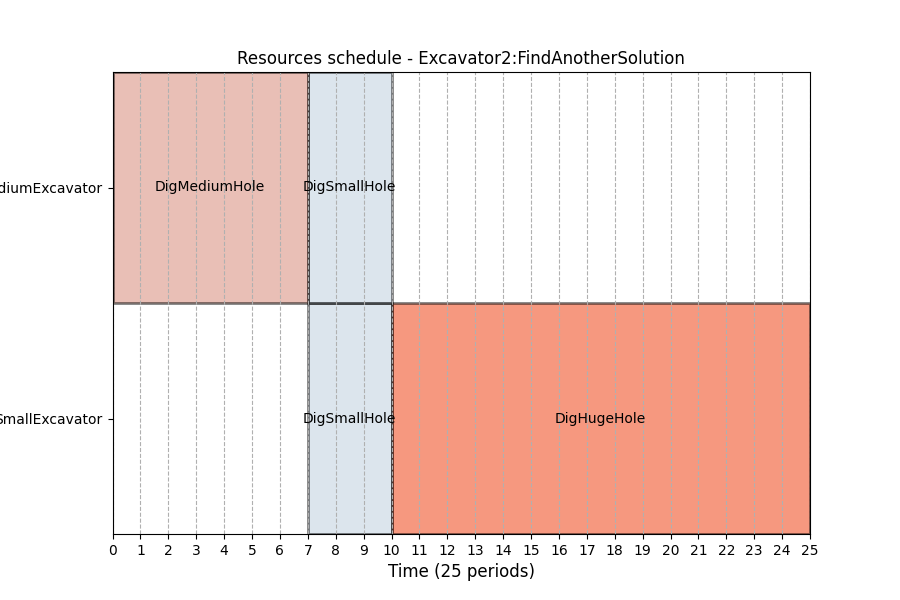

In [5]:
ps.render_gantt_matplotlib(solution)

Total computation time:
	Excavator2:FindAnotherSolution satisfiability checked in 0.01s


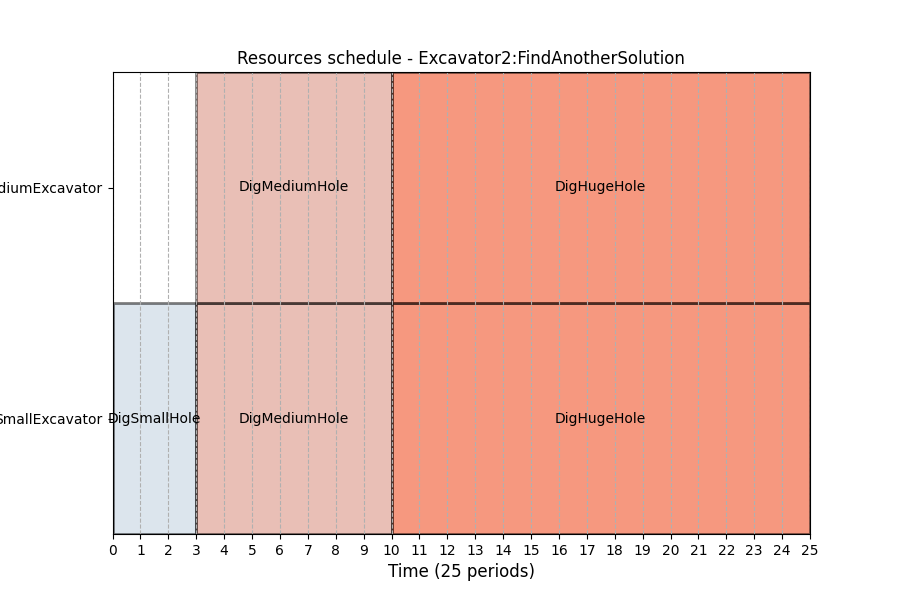

In [6]:
solution2 = solver.find_another_solution_for_variable(dig_medium_hole._start)
ps.render_gantt_matplotlib(solution2)

In [7]:
solution3 = solver.find_another_solution(dig_medium_hole._start)
ps.render_gantt_matplotlib(solution3)

TypeError: find_another_solution() takes 1 positional argument but 2 were given